<a href="https://colab.research.google.com/github/jo1132/YOLO/blob/master/YOLO/Rat_detection/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


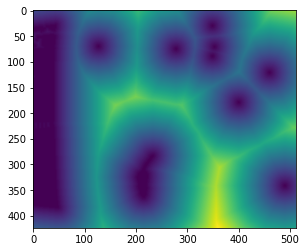

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('/content/drive/MyDrive/Colab Notebooks/공부용/YOLO/Ratchatcher/mouse_label_img100/000000000_000000000_c.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)


# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)


# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)


# Finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
result_dist_transform = cv.normalize(dist_transform, None, 255, 0, cv.NORM_MINMAX, cv.CV_8UC1)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(),255, cv.THRESH_BINARY)


# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers = cv.watershed(img, markers)

img[markers == -1] = [255, 0, 0]
img[markers == 1] = [255, 255, 0]

plt.imshow(result_dist_transform)


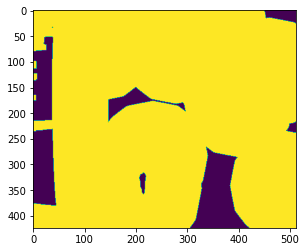

In [11]:
plt.imshow(unknown)

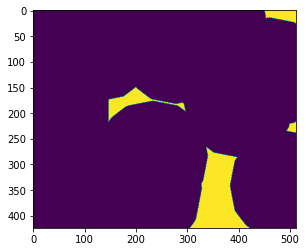

In [12]:
plt.imshow(sure_fg)

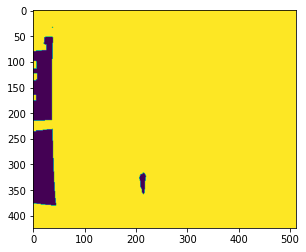

In [13]:
plt.imshow(sure_bg)

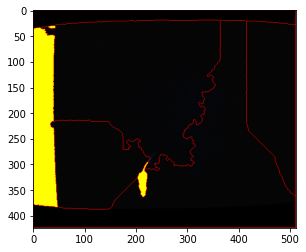

In [14]:
plt.imshow(img)

# CV2 to PIL

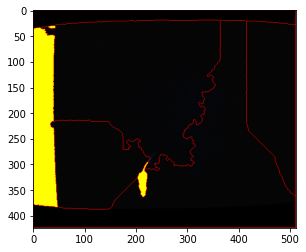

In [47]:
import cv2
import numpy as np
from PIL import Image

pil_img = Image.fromarray(img)
plt.imshow(pil_img)

# PIL RGB -> RGBA

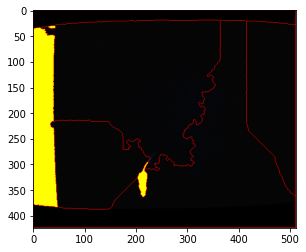

In [48]:
pil_img = pil_img.convert("RGBA")
plt.imshow(pil_img)

# 인식한 물체 외 나머지 배경 투명으로 만들기

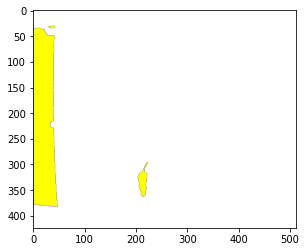

In [51]:
datas = pil_img.getdata()

newData = []

for item in datas:
  if(item == (255, 255, 0, 255)):
    newData.append(item)
  else:
    newData.append((0,0,0,0))

pil_img.putdata(newData)
plt.imshow(pil_img)

# PNG로 저장하기

In [54]:
pil_img.save('/content/drive/MyDrive/Colab Notebooks/공부용/YOLO/Ratchatcher/TEST_img.png', "PNG")